# MEMS 1.6 Log Reader
by Andrew Jackson

This popular and flexible Engine Management system is fitted to the Rover Mini Spi and Mpi models and a large range of earlier Rover cars. It can be used in single or multi injector applications. It was superseded by the near identical MEMS 1.9. There are two versions of the ECU, one having two connectors and the other having a blanking plate in place of the second connector.

Specify the path to the MEMS readmems logfile to be read and diagnosed in the logfile variable below. The log file can be generated by running the readmems command and piping the output to a file.


**Vehicle Registration:** M117 OPP

**Vehicle Model       :** Rover Cooper SPI

**Vehicle Year        :** 1993

In [5]:
logfile = './logs/2018-11-19_faulty_thermostat.log'
logfile = './logs/2018-11-23_fixed_thermostat.log'

In [24]:
import mems.logreader
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
lr = mems.logreader.LogReader()
lr.read_logfile(logfile)
lr.get_version()

'MEMS ECU ID: MNE101070'

In [25]:
lr.display_faults()

No faults


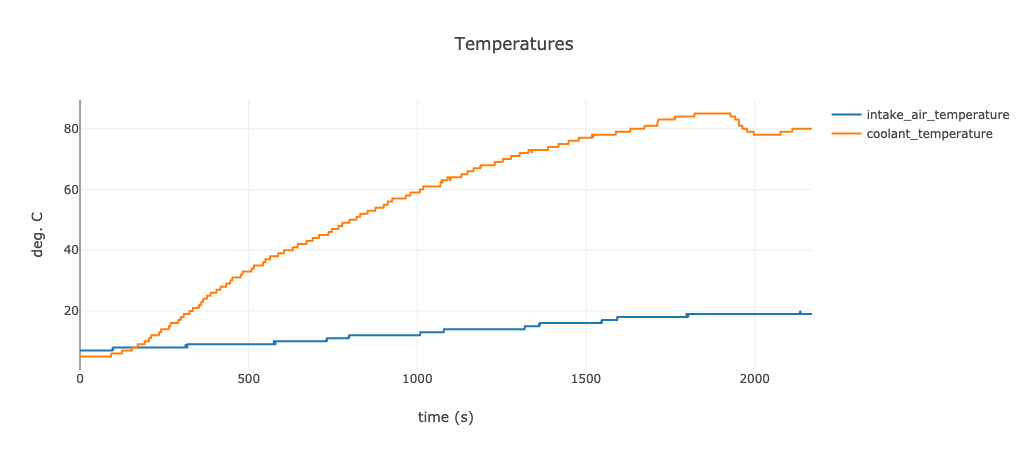

In [26]:
lr.display_graph(['intake_air_temperature','coolant_temperature'], 'Temperatures', 'deg. C')

Coolant temperature: This shows the coolant temperature as measured by the ECU. If the sensor is open circuit, a default value of about 60C will be displayed. During engine warm up, the value should rise smoothly from ambient to approximately 90C. Sensor faults may cause several symptoms including poor starting, fast idle speed, poor fuel consumption and cooling fans running continuously.

Inlet air temperature: This shows the temperature measured by the ECU using the inlet air temperature sensor (if fitted). If the sensor is open circuit, then a fixed default value will be displayed. The inlet air temperature is used by the ECU to retard the ignition timing to avoid knock and trim the fuelling when hot. If the sensor is not operating correctly the engine performance may be impaired slightly.

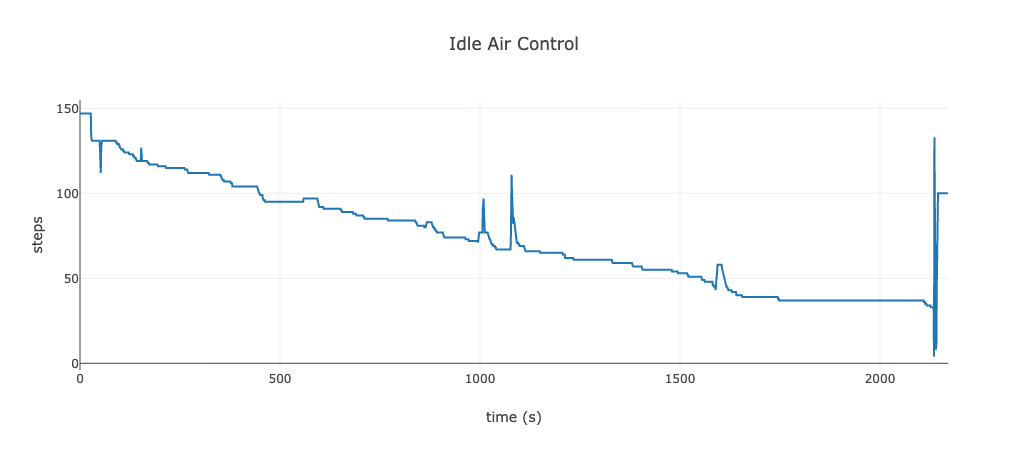

In [27]:
lr.display_graph(['idle_air_contol_position'], 'Idle Air Control', 'steps')

This is the number of steps from 0 which the ECU will use as guide for starting idle speed control during engine warm up. The value will start at quite a high value (>100 steps) on a very cold engine and fall to < 50 steps on a fully warm engine. A high value on a fully warm engine or a low value on a cold engine will cause poor idle speed control. Idle run line position is calculated by the ECU using the engine coolant temperature sensor.

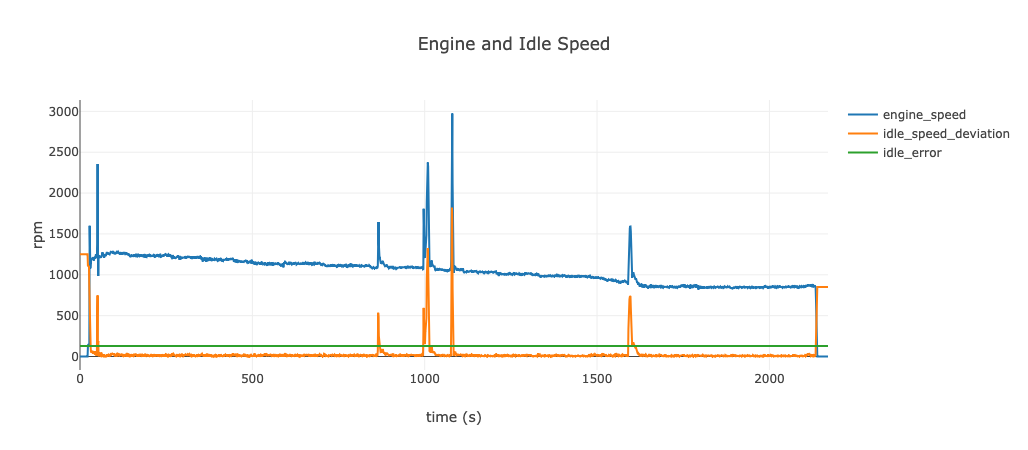

In [28]:
lr.display_graph(['engine_speed','idle_speed_deviation', 'idle_error'], 'Engine and Idle Speed', 'rpm')

Engine speed: The rotational speed of the engine calculated by the MEMS ECU using the crankshaft sensor. Faults in the crankshaft sensor or associated wiring may be indicated if this display reads 0 during engine cranking.

Idle Speed Deviation is the current difference between the target idle speed set by the MEMS ECU and the actual engine speed. A value of more than 100 RPM indicates that the ECU is not in control of the idle speed. This indicates a possible fault condition. A quick addition of this value and the current engine RPM will also tell what the value is of the ECU's target Idle Speed.

Idle Error is the number of IACV steps from fully closed (0) which the ECU has learned as the correct position to maintain the target idle speed with a fully warmed up engine. If this value is outside the range 10 - 50 steps, then this is an indication of a possible fault condition or poor adjustment.

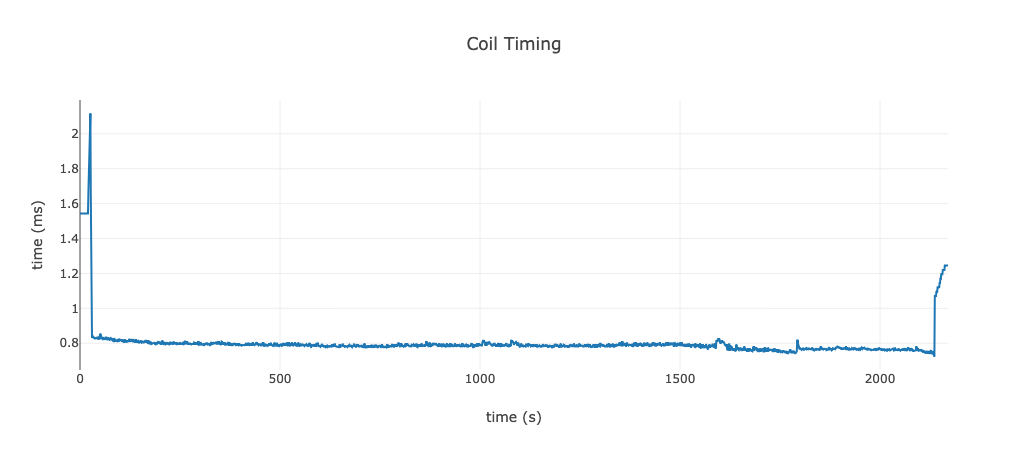

In [29]:
lr.display_graph(['coil_time'], 'Coil Timing', 'time (ms)')

This is the time for the ignition coil to charge up to its specified current, as measured by the MEMS ECU. With a battery voltage of about 14V, this value should be about 2-3mS. A high value for coil charge time may indicate a problem with the ignition coil primary circuit.

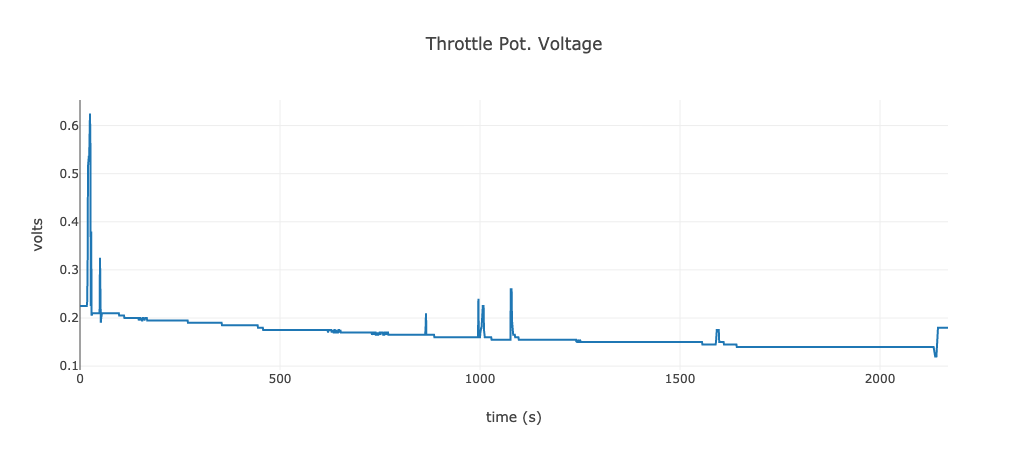

In [30]:
lr.display_graph(['throttle_pot_voltage'], 'Throttle Pot. Voltage', 'volts')

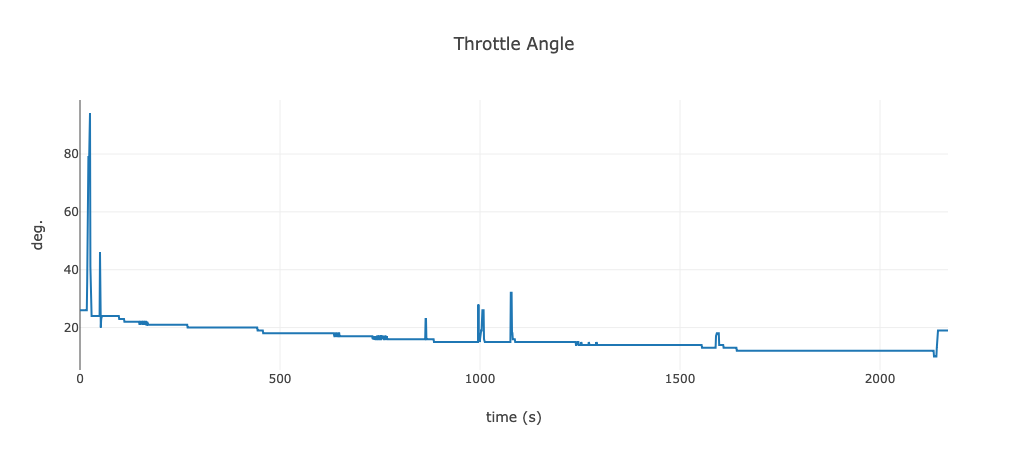

In [31]:
lr.display_graph(['throttle_angle'], 'Throttle Angle', 'deg.')

Shows the position of the throttle disc obtained from the MEMS ECU using the throttle potentiometer. This value should change from a low value to a high value as the throttle pedal is depressed.

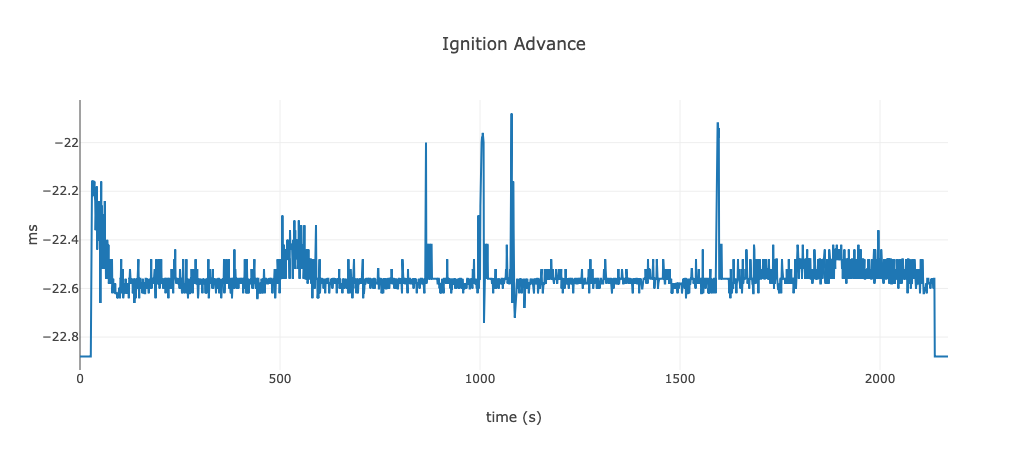

In [32]:
lr.display_graph(['ignition_advance'], 'Ignition Advance', 'ms')

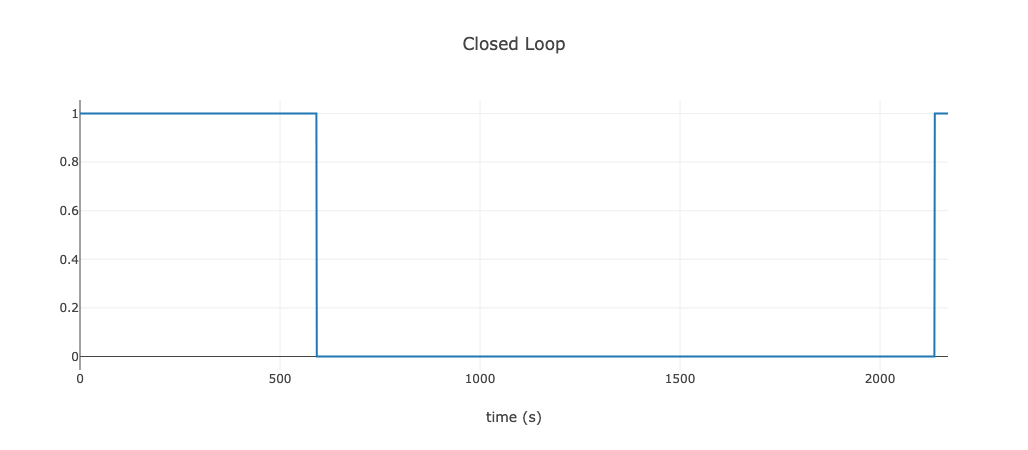

In [33]:
lr.display_graph(['loop_indicator'], 'Closed Loop')

This shows whether the fuelling is being controlled using feedback from the oxygen sensors. A displayed value of ON indicates that closed loop fuelling is active, a displayed value of OFF indicates fuelling open loop. On a fully warm vehicle, Loop Status should indicate closed loop under most driving and idling conditions.

This is a facility which is built into the MEMS ECU to overcome some situations during the service life of a vehicle where it might be wished to eradicate a problem such as a low octane fuel being constantly used or engine wear by slightly advancing the ignition timing. the idle speed of the engine. The function can be removed by resetting the adaptive values.

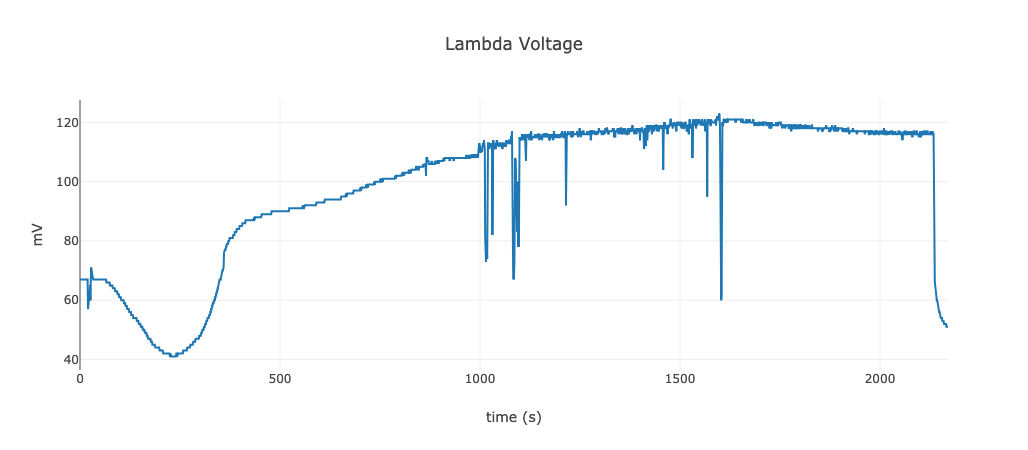

In [34]:
lr.display_graph(['lambda_voltage'], 'Lambda Voltage', 'mV')

This shows the voltage across the oxygen sensor as read by the MEMS ECU. Once the engine is fully warm, during most idle and driving conditions, this voltage will switch rapidly between a value between 0.0v-0.2v to a value between 0.7v and 1.0v. The sensor detects the presence or absence of oxygen in the exhaust gas. When the exhaust gas has oxygen present the ECU will read a low voltage.

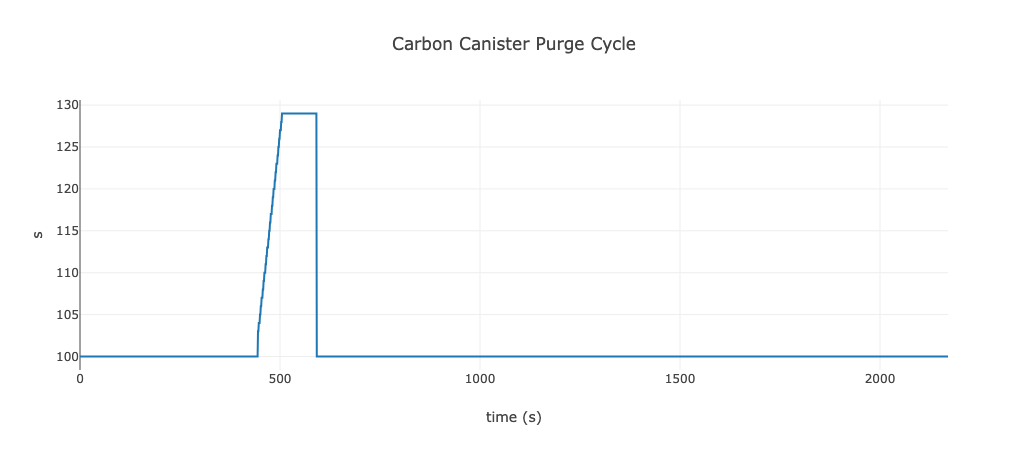

In [35]:
lr.display_graph(['carbon_canister_purge_valve_duty_cycle'], 'Carbon Canister Purge Cycle', 's')

The canister purge valve forms part of the emission control system. Petrol vapor from the petrol tank that is stored in the carbon absorption filter, is conveyed to the engine through this solenoid valve.
If the lambda control of the engine is functioning, the valve is powered by the control unit. The extra fuel in form of vapor that is conveyed through this system to the engine is compensated for by the lambda control.

Generally the canister purge valve is closed normally. This means that the valve breaks the connection between the intake manifold and the active carbon filter, if no current is running through the valve. The activation of the canister purge valve occurs by means of the control unit connecting the valve to ground. During this time the voltage of the terminal from the control unit that connects the canister purge valve, amounts to 0 Volt. Frequently triggering takes place with pulses. The pulse ratio (duty-cycle) then depends on engine speed, engine temperature and engine load, among other things.

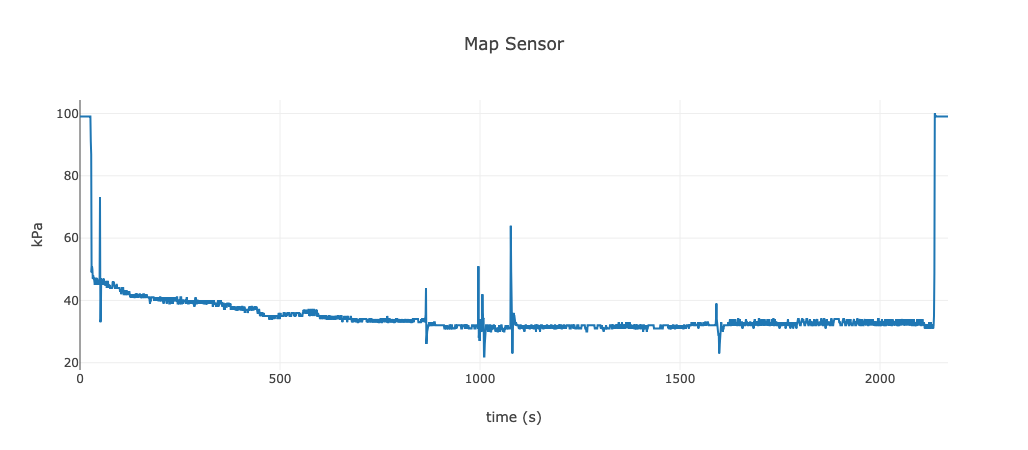

In [36]:
lr.display_graph(['map_sensor'], 'Map Sensor', 'kPa')

Shows the pressure measure by the internal MEMS air pressure sensor. This value should show atmospheric pressure of 100 KPa when the engine is stopped and a lower value between 25 - 40 KPa during engine idle conditions. Very high values may indicate problems with the sensor inside the MEMS or more likely a blocked or disconnected vacuum pipe. Moderately raised values may indicate mechanical problems with the engine.

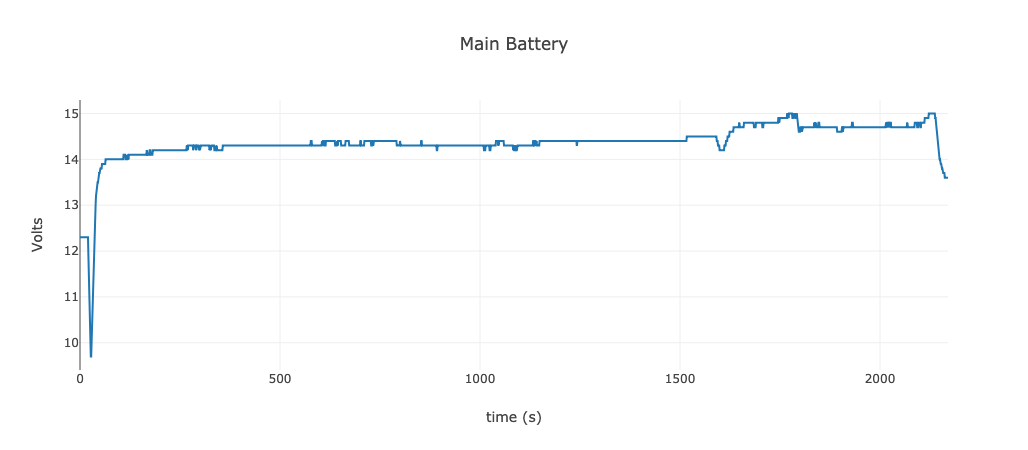

In [37]:
lr.display_graph(['battery_voltage'], 'Main Battery', 'Volts')

This shows the voltage of the vehicle supply measured internally by the ECU. Large errors in this measurement will lead to possible poor starting and errors in idle CO.

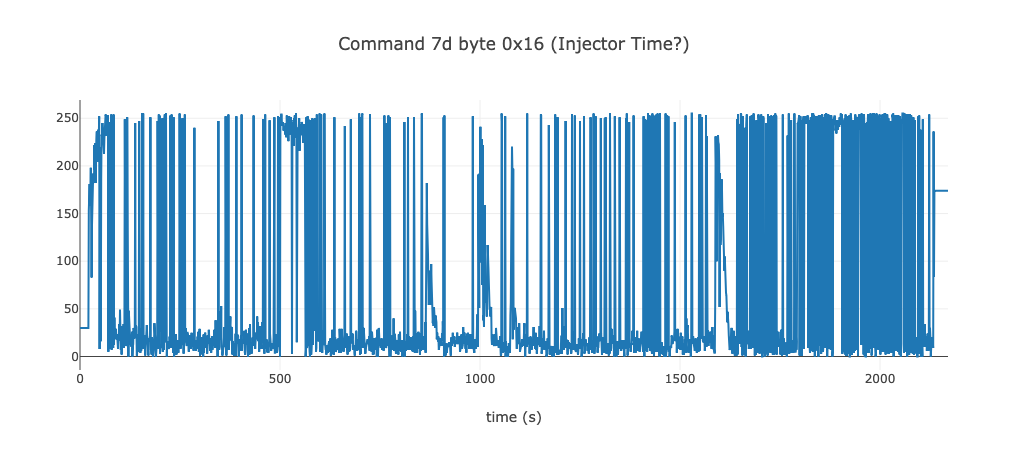

In [38]:
lr.display_graph(['0x16'], 'Command 7d byte 0x16 (Injector Time?)')

This is a representative value (0 to 255) of the correction trim value of the fuel injection time currently being used by the MEMS ECU. This value is mainly used to adjust the idle fuelling. The value of Injector time is normally an adaptive value which is set up automatically by the ECU on Vehicles fitted with an oxygen sensor. However for vehicles not equipped with an Oxygen sensor this value must be adjusted manually to obtain the correct fuelling. This is done by using a CO meter to monitor the exhaust output and adjusting this value until it is correct (open loop tuning) The correct CO values for a given engine can usually be found in the Workshop manual. This value is also shown under dynamic inputs in a scale of microseconds

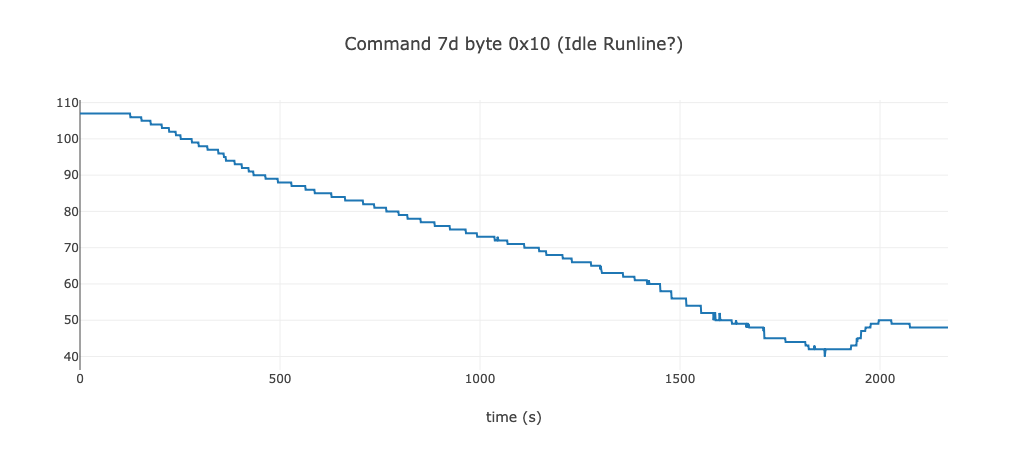

In [39]:
lr.display_graph(['0x10'], 'Command 7d byte 0x10 (Idle Runline?)')

This is the number of steps from 0 which the ECU will use as guide for starting idle speed control during engine warm up. The value will start at quite a high value (>100 steps) on a very cold engine and fall to < 50 steps on a fully warm engine. A high value on a fully warm engine or a low value on a cold engine will cause poor idle speed control. Idle run line position is calculated by the ECU using the engine coolant temperature sensor.

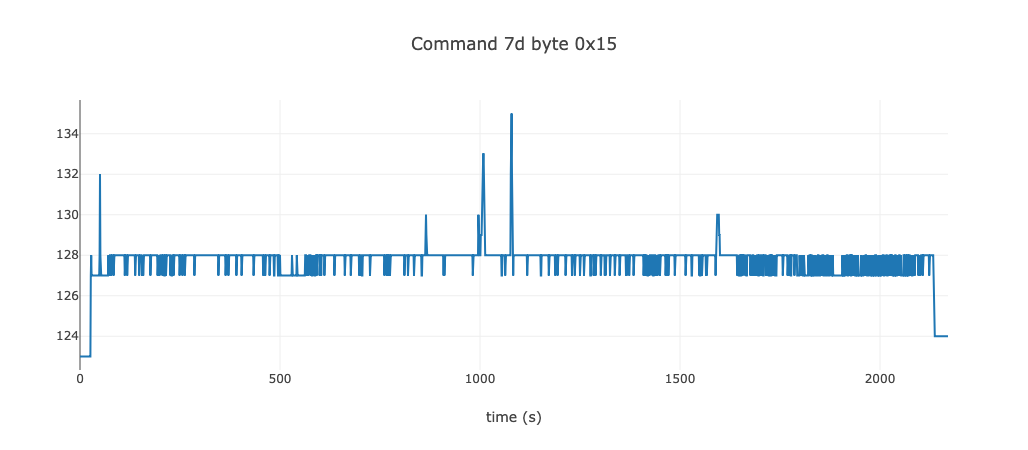

In [40]:
lr.display_graph(['0x15'], 'Command 7d byte 0x15')

In [41]:
lr.display_dimensions()

name                                                min    median       max
0x01                                                  0        16        16
throttle_angle                                       10        15        94
0x03                                                255       255       255
0x04                                                125       146       147
lambda_frequency                                      0         0         0
lambda_voltage                                       41       112       123
lambda_duty_cycle                                   255       255       255
lambda_status                                       255       255       255
loop_indicator                                        0         0         1
long_term_trim                                        0         0         1
short_term_trim                                     149       149       149
carbon_canister_purge_valve_duty_cycle              100       100       129
0x0E        